# Random number generation

```{admonition} Important!
:class: tip
If you're completely new to Python, you may want to go through the exercises in the {doc}`../tutorials/1_fund-python_blank` notebook first!
```

There are many instances in probability and statistics, particularly when it comes to sampling, that you will need to produce **random numbers** or simulate **random processes**.
This can be done quite efficiently in Python, allowing you to model engineering designs with greater confidence.

```{note}
The syntax for generating random numbers in Python has evolved over the years, so this workbook tries to follow current best practices!
```

## Summary of commands

In this exercise, we will demonstrate the following:
- [**Numpy**](https://numpy.org/doc/stable/index.html)
  - [`np.random.default_rng()`](https://numpy.org/doc/stable/reference/random/generator.html) - Object for generating random values.
    - Optional `seed` for consistent values.
  - [`rng.uniform(low, high, size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html) - Generates a random array of `size` dimensions from a uniform distribution between `[low, high)`.
    - If `size` is not specified, then a single value is generated.
  - [`np.abs(arr)`](https://numpy.org/doc/stable/reference/generated/numpy.absolute.html) - Takes the absolute value of all elements in `arr`.
  - [`np.sum(arr)`](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) - Sums the values in `arr`.
    - Can be along a specific `axis` if given.
- [**Matplotlib**](https://matplotlib.org/stable/)
  - [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) - Create Figure and Axes objects for plotting. Many optional parameters.
  - [`ax.hist(arr, bins)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html) - Create a frequency plot (histogram) of the elements in `arr`, grouped into `bins` columns if specified (otherwise auto-calculated).

## Demo

We will attempt to solve one of the homework problems numerically by performing a virtual experiment using NumPy's [random number generator](https://numpy.org/doc/stable/reference/random/generator.html).
The problem is as follows:

Two points $a$ and $b$ are selected at random along the $x$-axis such that $-2 \le b \le 0$ and $0 \le a \le 3$.
Find the probability that the distance between $a$ and $b$ is greater than $3$ by performing one million trials.
Make a histogram of the generated distances between $a$ and $b$.

Hint: Generating a vector of random numbers all at once is computationally more efficient than generating random values one at a time within a `for` loop!

In [2]:
# import necessary libraries
import numpy as np

# create the rng object; we use a seed for consistent results
rng = np.random.default_rng(seed=1)

# store the number of trials
N = int(1e6)

# draw the samples and compute the values
b = rng.uniform(-2, 0, N)
a = rng.uniform(0, 3, N)
d = np.abs(a - b)
s = np.sum(d > 3)    # inner argument creates a logical array/mask of 0/1
print(f"Probability = {s/N:.3f}")

Probability = 0.333


The final line uses the special [_f-strings_](https://docs.python.org/3/tutorial/inputoutput.html#formatted-string-literals) construct, which we encourage you to learn as it's very efficient.

Now that we have the data, we can also plot it.

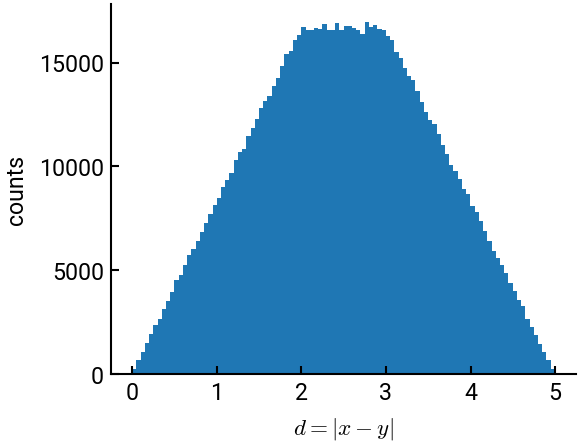

In [3]:
# import necessary libraries
import matplotlib.pyplot as plt

# create the Figure and Axes objects
fig, ax = plt.subplots()

# make the histogram 
ax.hist(d, bins=100)

# style the plot (with LaTeX!) and show it
ax.set(xlabel=r"$d = |x - y|$", ylabel='counts')
plt.show()